In [1]:
from google.colab import drive

In [2]:
drive.mount('drive')

Mounted at drive


In [3]:
dataset_path='/content/drive/MyDrive/heart-failure-prediction/heart.csv'
#0-normal,1-heart disease

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##Understanding the dataset

In [5]:
df=pd.read_csv(dataset_path)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.isna().sum()
#no missing values!

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [9]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [10]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [11]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [12]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [13]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

##Label Encoding for categorical columns

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
le.fit(df['Sex'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'F': 0, 'M': 1}


In [17]:
#label encoding for Sex column
df['Sex'] = le.fit_transform(df['Sex'])
df['Sex']

0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Sex, Length: 918, dtype: int64

In [18]:
le.fit(df['ChestPainType'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}


In [19]:
#label encoding for ChestPainType column
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['ChestPainType']

0      1
1      2
2      1
3      0
4      2
      ..
913    3
914    0
915    0
916    1
917    2
Name: ChestPainType, Length: 918, dtype: int64

In [20]:
le.fit(df['RestingECG'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'LVH': 0, 'Normal': 1, 'ST': 2}


In [21]:
#label encoding for Sex column
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['RestingECG']

0      1
1      1
2      2
3      1
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: RestingECG, Length: 918, dtype: int64

In [22]:
le.fit(df['ExerciseAngina'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'N': 0, 'Y': 1}


In [23]:
#label encoding for ExerciseAngina column
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ExerciseAngina']

0      0
1      0
2      0
3      1
4      0
      ..
913    0
914    0
915    1
916    0
917    0
Name: ExerciseAngina, Length: 918, dtype: int64

In [24]:
le.fit(df['ST_Slope'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Down': 0, 'Flat': 1, 'Up': 2}


In [25]:
#label encoding for ST_Slope column
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df['ST_Slope']

0      2
1      1
2      2
3      1
4      2
      ..
913    1
914    1
915    1
916    1
917    2
Name: ST_Slope, Length: 918, dtype: int64

##Feature Selection

**Problem statement:**

Predict if patient will suffer from heart failure or not.





So,target column is the last column of the df

Remaining columns of the datafram are the features/the info required to be taken from the user to predict if the patient will suffer from heart-failure.

In [26]:
x=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

##Train-test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
x_train.shape,y_train.shape

((734, 11), (734,))

In [30]:
x_test.shape,y_test.shape

((184, 11), (184,))

##Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()

In [33]:
lr

LogisticRegression()

In [34]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [35]:
y_pred = lr.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
accuracy_score(y_pred,y_test)       

0.8369565217391305

In [38]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        83
           1       0.86      0.84      0.85       101

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [39]:
print(confusion_matrix(y_pred,y_test))

[[69 14]
 [16 85]]


##SVC Model

In [40]:
from sklearn.svm import SVC

In [41]:
model=SVC()

In [42]:
model.fit(x_train,y_train)

SVC()

In [43]:
y_pred=model.predict(x_test)

In [44]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1])

In [45]:
accuracy_score(y_pred,y_test)

0.6684782608695652

In [46]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63        82
           1       0.71      0.69      0.70       102

    accuracy                           0.67       184
   macro avg       0.67      0.67      0.67       184
weighted avg       0.67      0.67      0.67       184



In [47]:
print(confusion_matrix(y_pred,y_test))

[[53 29]
 [32 70]]


##RFClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model=RandomForestClassifier()

In [50]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred=model.predict(x_test)

In [52]:
accuracy_score(y_pred,y_test)

0.875

In [53]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        72
           1       0.95      0.84      0.89       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.89      0.88      0.88       184



In [54]:
print(confusion_matrix(y_pred,y_test))

[[67  5]
 [18 94]]


##Comparing the models

In [69]:
accuracies=[84,67,88]
algos=['Logistic Regression','SVC','Random Forest Classifier']

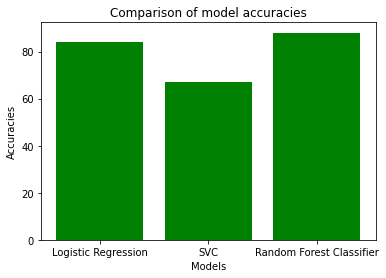

In [70]:
plt.bar(algos,accuracies,color='g')
plt.xlabel('Models')
plt.ylabel("Accuracies")
plt.title("Comparison of model accuracies")
plt.savefig('graph-1.png')
plt.show()


In [78]:
fns=[16,32,18]
fps=[14,29,5]

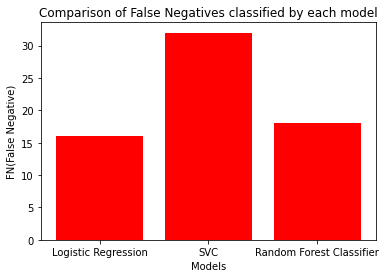

In [79]:
plt.bar(algos,fns,color='r')
plt.xlabel('Models')
plt.ylabel("FN(False Negative)")
plt.title("Comparison of False Negatives classified by each model")
plt.savefig('graph-2f.png')
plt.show()

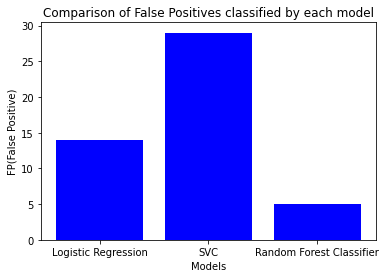

In [80]:
plt.bar(algos,fps,color='b')
plt.xlabel('Models')
plt.ylabel("FP(False Positive)")
plt.title("Comparison of False Positives classified by each model")
plt.savefig('graph-3f.png')
plt.show()

LR is the best-false negative should be as less as possible(predicted-heart not failed but heart actually failed=>patient will miss out some treatments)

##Save the best model

In [81]:
lr
#just for confirmation

LogisticRegression()

In [82]:
import pickle

In [83]:
model_save_path='/content/drive/MyDrive/heart-failure-prediction/rfmodel_pkl'

In [84]:
# create an iterator object with write permission - model.pkl
with open(model_save_path, 'wb') as files:
    pickle.dump(model, files)

In [64]:
# load saved model
# with open('model_pkl' , 'rb') as f:
#     my_model = pickle.load(f)